<a href="https://colab.research.google.com/github/mohansanthichinthala/Artifical-Interface/blob/main/model_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running example model checks...
=== CLASSIFICATION MODEL CHECK ===
Accuracy: 0.9450
Precision: 0.9451
Recall: 0.9450
F1-Score: 0.9450

Confusion Matrix:
[[106   6]
 [  5  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       112
           1       0.93      0.94      0.94        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



=== REGRESSION MODEL CHECK ===
Mean Squared Error: 0.0111
Root Mean Squared Error: 0.1053
Mean Absolute Error: 0.0854
R² Score: 1.0000


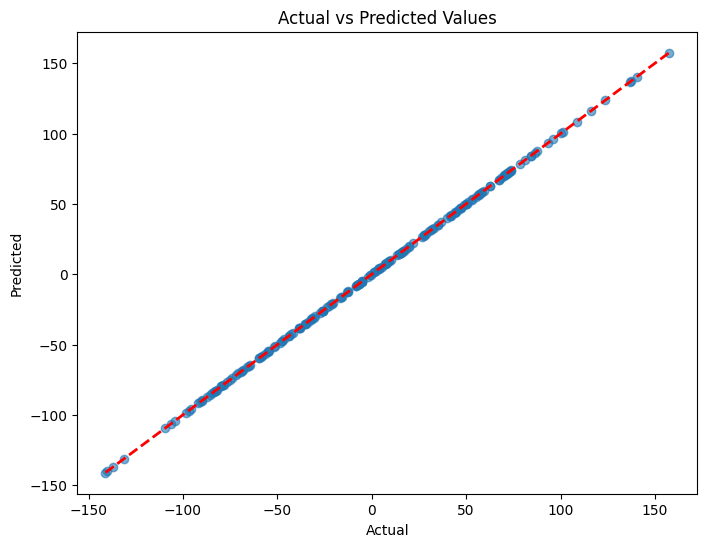



=== CROSS-VALIDATION CHECK ===
Cross-validation scores: [0.92  0.945 0.945 0.93  0.925]
Average CV score: 0.9330
Standard deviation: 0.0103
95% confidence interval: [0.9124, 0.9536]


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Model Performance Check
def check_classification_model(model, X_train, X_test, y_train, y_test):
    """
    Comprehensive check for classification models
    """
    print("=== CLASSIFICATION MODEL CHECK ===")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

def check_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Comprehensive check for regression models
    """
    print("=== REGRESSION MODEL CHECK ===")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.show()

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2_score': r2
    }

# 2. Cross-Validation Check
def cross_validation_check(model, X, y, cv=5, scoring='accuracy'):
    """
    Perform cross-validation to check model stability
    """
    print("=== CROSS-VALIDATION CHECK ===")

    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

    print(f"Cross-validation scores: {scores}")
    print(f"Average CV score: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}")
    print(f"95% confidence interval: [{scores.mean() - 2*scores.std():.4f}, {scores.mean() + 2*scores.std():.4f}]")

    return scores

# 3. Overfitting/Underfitting Check
def overfitting_check(model, X, y, param_name, param_range):
    """
    Check for overfitting using validation curves
    """
    print("=== OVERFITTING CHECK ===")

    train_scores, val_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(param_range, val_mean, 'o-', color='red', label='Validation score')
    plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.title('Validation Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_scores, val_scores

# 4. Model Assumptions Check (for Linear Models)
def check_linear_regression_assumptions(model, X, y):
    """
    Check assumptions for linear regression
    """
    print("=== LINEAR REGRESSION ASSUMPTIONS CHECK ===")

    # Fit the model
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # 1. Linearity check
    plt.figure(figsize=(15, 10))

    # Plot 1: Residuals vs Fitted
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')

    # Plot 2: Q-Q plot for normality
    from scipy import stats
    plt.subplot(2, 3, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot (Normality Check)')

    # Plot 3: Histogram of residuals
    plt.subplot(2, 3, 3)
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Histogram of Residuals')

    # Plot 4: Scale-Location plot
    plt.subplot(2, 3, 4)
    plt.scatter(y_pred, np.sqrt(np.abs(residuals)))
    plt.xlabel('Fitted values')
    plt.ylabel('√|Residuals|')
    plt.title('Scale-Location Plot')

    # Plot 5: Residuals vs Leverage (if applicable)
    plt.subplot(2, 3, 5)
    plt.scatter(range(len(residuals)), residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Observation')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Observation Order')

    plt.tight_layout()
    plt.show()

    # Statistical tests
    print("\nStatistical Tests:")

    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f"Shapiro-Wilk test for normality: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

    # Durbin-Watson test for autocorrelation
    from statsmodels.stats.diagnostic import durbin_watson
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson test for autocorrelation: {dw_stat:.4f}")

    return residuals

# 5. Feature Importance Check
def check_feature_importance(model, feature_names):
    """
    Check feature importance for tree-based models
    """
    print("=== FEATURE IMPORTANCE CHECK ===")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        print("Feature ranking:")
        for f in range(len(feature_names)):
            print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_names)), importances[indices])
        plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
        plt.title('Feature Importance')
        plt.ylabel('Importance Score')
        plt.tight_layout()
        plt.show()

        return importances
    else:
        print("Model doesn't have feature_importances_ attribute")
        return None

# 6. Model Comparison Check
def compare_models(models, model_names, X_train, X_test, y_train, y_test):
    """
    Compare multiple models
    """
    print("=== MODEL COMPARISON CHECK ===")

    results = {}

    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[model_names[i]] = accuracy

        print(f"{model_names[i]}: {accuracy:.4f}")

    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title('Model Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results

# Example usage
if __name__ == "__main__":
    # Generate sample data
    from sklearn.datasets import make_classification, make_regression

    # Classification example
    X_class, y_class = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

    # Regression example
    X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Example model checks
    print("Running example model checks...")

    # Classification model check
    clf_model = RandomForestClassifier(random_state=42)
    check_classification_model(clf_model, X_train_c, X_test_c, y_train_c, y_test_c)

    print("\n" + "="*50 + "\n")

    # Regression model check
    reg_model = LinearRegression()
    check_regression_model(reg_model, X_train_r, X_test_r, y_train_r, y_test_r)

    print("\n" + "="*50 + "\n")

    # Cross-validation check
    cross_validation_check(clf_model, X_class, y_class)